# Part 6 of Recipes: Manipulating Histograms

This page is primarily based on the following page at the Circos documentation site:



- [6. Manipulating Histograms](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 5 by clicking [here &#8592;](Recipes_Part5.ipynb).



----



8 --- Recipes
=============

6. Manipulating Histograms
--------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/complex_histograms/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/complex_histograms/images){.normal}
[Configuration](/documentation/tutorials/recipes/complex_histograms/configuration){.normal}
:::

### mapping value to histogram fill

The fill of histogram bins can be changed based on the histogram bin
value using a rule like the following.

```ini
# remap the histogram value from the range [-0.6,0.6] onto the index [0,5], then
# use the index to select the color from the list
# dorange orange lorange lblue blue dblue
# 
# Perl syntax for referencing an element of a list is qw(a b c d)[index]
# where index starts at 0.
<rule>
condition  = 1
fill_color = eval(qw(dorange orange lorange lblue blue dblue)[remap_int(var(value),-0.6,0.6,0,5)])
</rule>
```


### layered background color and macros

Recall that you can use `conf()` to reference a configuration parameter.
This is described in detail in the [Automation and Macros
tutorial](/documentation/tutorials/quick_start/automation_and_macros).

In this example, I create a background for the histogram track that has
six colored layers: tones of blue for positive values and tones of
orange for negative values. Both cutoffs for the layers and colors will
be defined as parameters within the [\<plot\>]{.syn-block} block.

Each separate colored layer in the background is defined by its own
[\<background\>]{.syn-block} block.

```ini
<plot>
...
# define background color cutoffs
bgy1 = 0.2    # first cutoff
bgy2 = 0.5    # second cutoff
bgc1 = orange # bg color for negative values
bgc2 = blue   # bg color for positive values
...
```


```ini
<backgrounds>
# use the parameters above using conf(.,param)
<background>
color = lconf(.,bgc2)
y0    = conf(.,bgy2)
</background>
<background>
color = vlconf(.,bgc2)
y1    = conf(.,bgy2)
y0    = conf(.,bgy1)
</background>
<background>
color = vvlconf(.,bgc2)
y1    = conf(.,bgy1)
y0    = 0
</background>
<background>
color = vvlconf(.,bgc1)
y1    = 0
y0    = -conf(.,bgy1)
</background>
<background>
color = vlconf(.,bgc1)
y1    = -conf(.,bgy1)
y0    = -conf(.,bgy2)
</background>
<background>
color = lconf(.,bgc1)
y1    = -conf(.,bgy2)
</background>
</backgrounds>
```


```ini
</plot>
```


### y-axis grid and macros

The axis grid can also reference the histogram cutoff values.

```ini
<axes>
```


```ini
# every 25% with low transparency
<axis>
color     = grey_a1
thickness = 2
spacing   = 0.25r
```


```ini
# every 5% with higher transparency
<axis>
color     = grey_a3
thickness = 1
spacing   = 0.05r
</axis>
```


```ini
# thick line at y=0
<axis>
color     = grey_a1
thickness = 5
position  = 0
</axis>
```


```ini
# at each background cutoff, a thick white line
<axis>
color     = white
thickness = 5
position  = -conf(.,bgy2),-conf(.,bgy1),conf(.,bgy1),conf(.,bgy2)
</axis>
```


```ini
</axes>
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/6/

/home/jovyan/circos-tutorials-0.67/tutorials/8/6


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.37s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.37s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/6
debuggroup summary 0.37s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.37s loading configuration from file circos.conf
debuggroup summary 0.37s found conf file circos.conf
debuggroup summary 0.57s debug will appear for these features: output,summary
debuggroup summary 0.57s bitmap output image ./circos.png
debuggroup summary 0.57s SVG output image ./circos.svg
debuggroup summary 0.57s parsing karyotype and organizing ideograms
debuggroup summary 0.67s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.68s applying global and local scaling
debuggroup summary 0.69s allocating image, colors and brushes
debuggroup summary 2.91s drawing 24 ideograms of total size 3,095,677,436
debuggroup summary 2.91s drawing highlights and ideograms
debuggroup summ

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781, <F> line 600.


View the plot in this page using the following cell.

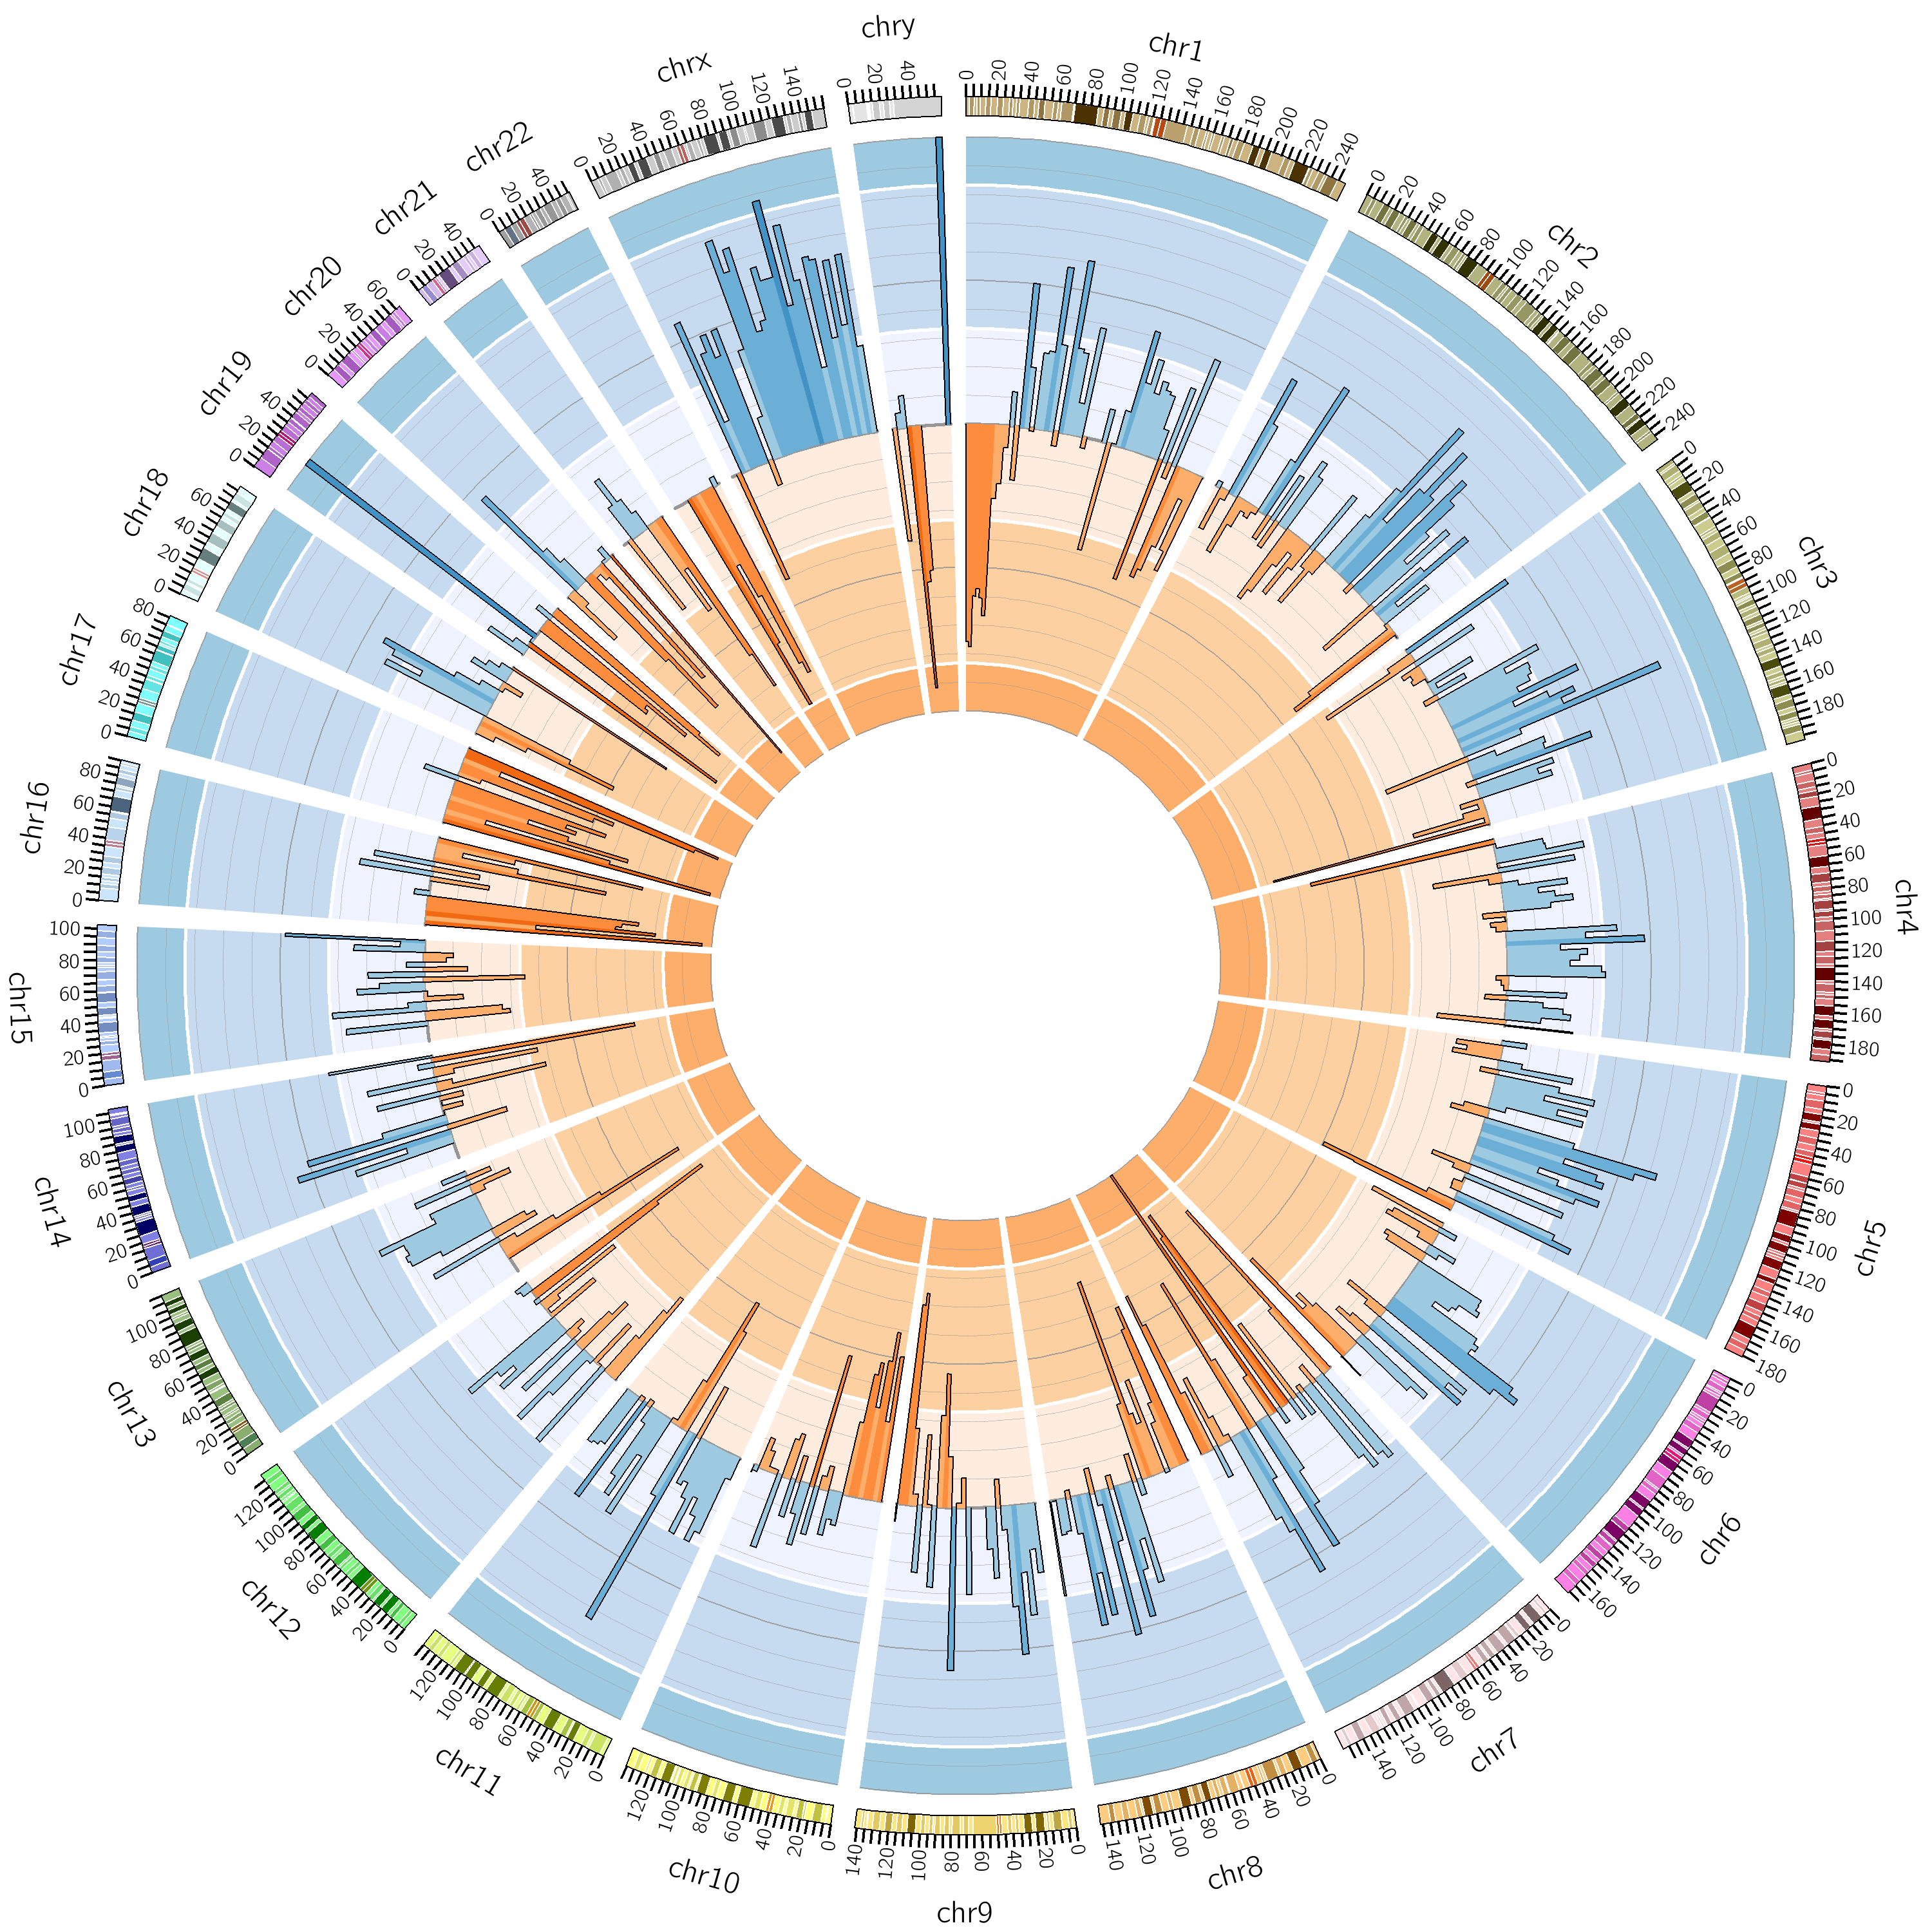

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part7.ipynb).

----